# Laboratorio 1

---

##### Nancy Mazariegos 22513
##### Santiago Pereira 22318
##### Giovanni Santos 22523

---

## Ejercicio #1
---
#### Parte práctica


Simule una disminución de la población debido a una tasa de mortalidad constante.
Instrucciones:
1. Implemente un modelo de stock-flujo donde:
a. Población Inicial: S0 = 1,000
b. Tasa de Mortalidad: α=0.1month−1
c. Horizonte de tiempo: 24 meses
2. Requerimientos
a. Utilice la integración de Euler (pasos de tiempo discretos) con Δt=0.1 meses
b. Compare con la solución analítica S(t) = S0e−αt
c. Grafique ambas soluciones en el mismo gráfico.


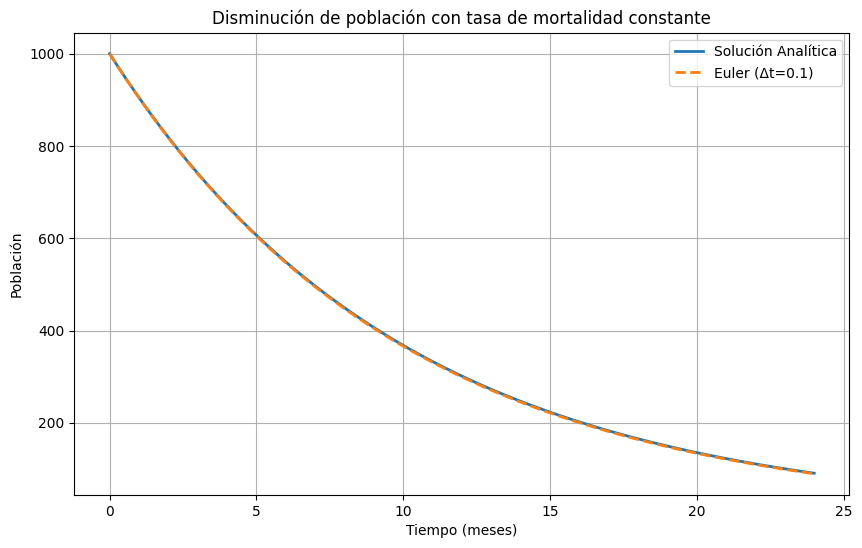

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 1000             
alpha = 0.1           
T = 24               
dt = 0.1              
tiempo = np.arange(0, T + dt, dt)
n = len(tiempo)
S_euler = np.zeros(n)
S_euler[0] = S0

for i in range(1, n):
    S_euler[i] = S_euler[i-1] - alpha * S_euler[i-1] * dt
S_analitica = S0 * np.exp(-alpha * tiempo)

plt.figure(figsize=(10, 6))
plt.plot(tiempo, S_analitica, label='Solución Analítica', linewidth=2)
plt.plot(tiempo, S_euler, '--', label='Euler (Δt=0.1)', linewidth=2)
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('Disminución de población con tasa de mortalidad constante')
plt.legend()
plt.grid(True)
plt.show()


3. Consider y responda

a. ¿Cómo afecta un Δt menor a la precisión? Un Δt menor mejora la precisión de la integración de Euler porque reduce el error acumulado en cada paso. Si se llegaran tener pasos más reducidos, la aproximación lineal de Euler se ajusta mejor a la curva real exponencial.

b. ¿Qué ocurre si un Δt es demasiado grande (p. ej., Δt = 5 meses)? Si Δt es demasiado grande, el método de Euler se vuelve inestable o impreciso. La solución puede desviarse significativamente de la curva analítica o incluso oscilar de forma no realista. Esto se debe a que la linealización de Euler deja de ser válida cuando el paso de tiempo es muy largo respecto a la escala del fenómeno.


## Ejercicio #2
---
#### Parte práctica

Modele una epidemia con vacunación utilizando el marco SIR.
Instrucciones
1. Analice el modelo epidémico SIR:
a. Stocks: Susceptibles (S), Infectados (I), Recuperados (R)
b. Flujos: Infección (βSI), Recuperación (γI), Vacunación (vS)
c. Parámetros: β = 0,3, γ = 0,1, v = 0,05
2. Requisitos:
a. Simular durante 180 días con Δt = 0.5 días
b. Gráficar S(t), I(t) y R(t) a lo largo del tiempo.
c. Variar v (de 0 a 0,1) y describir su impacto en el pico de infecciones

MODELO EPIDÉMICO SIR CON VACUNACIÓN
1. Simulación con parámetros básicos:
   - Población inicial: S=990, I=10, R=0
   - Pico de infecciones: 46.7 (día 18.5)
   - Población final: S=0.1, I=0.0, R=999.9


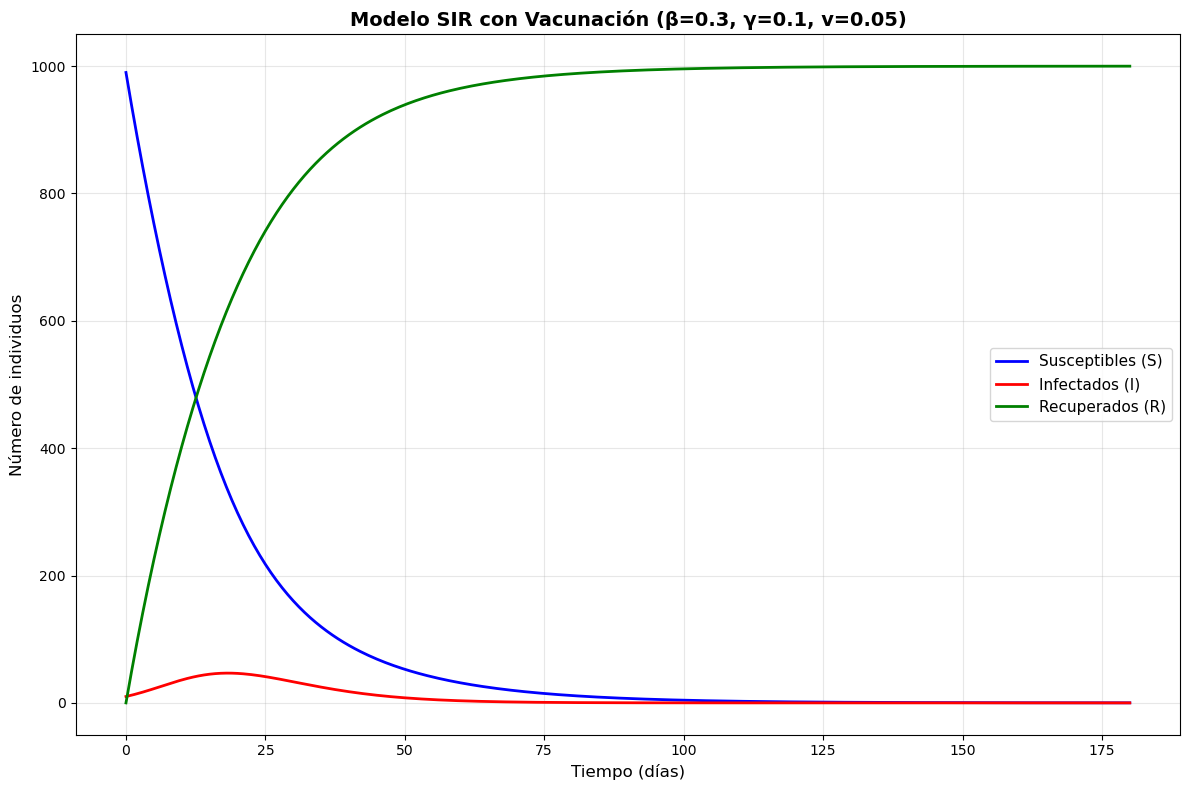


2. Análisis del impacto de diferentes tasas de vacunación:


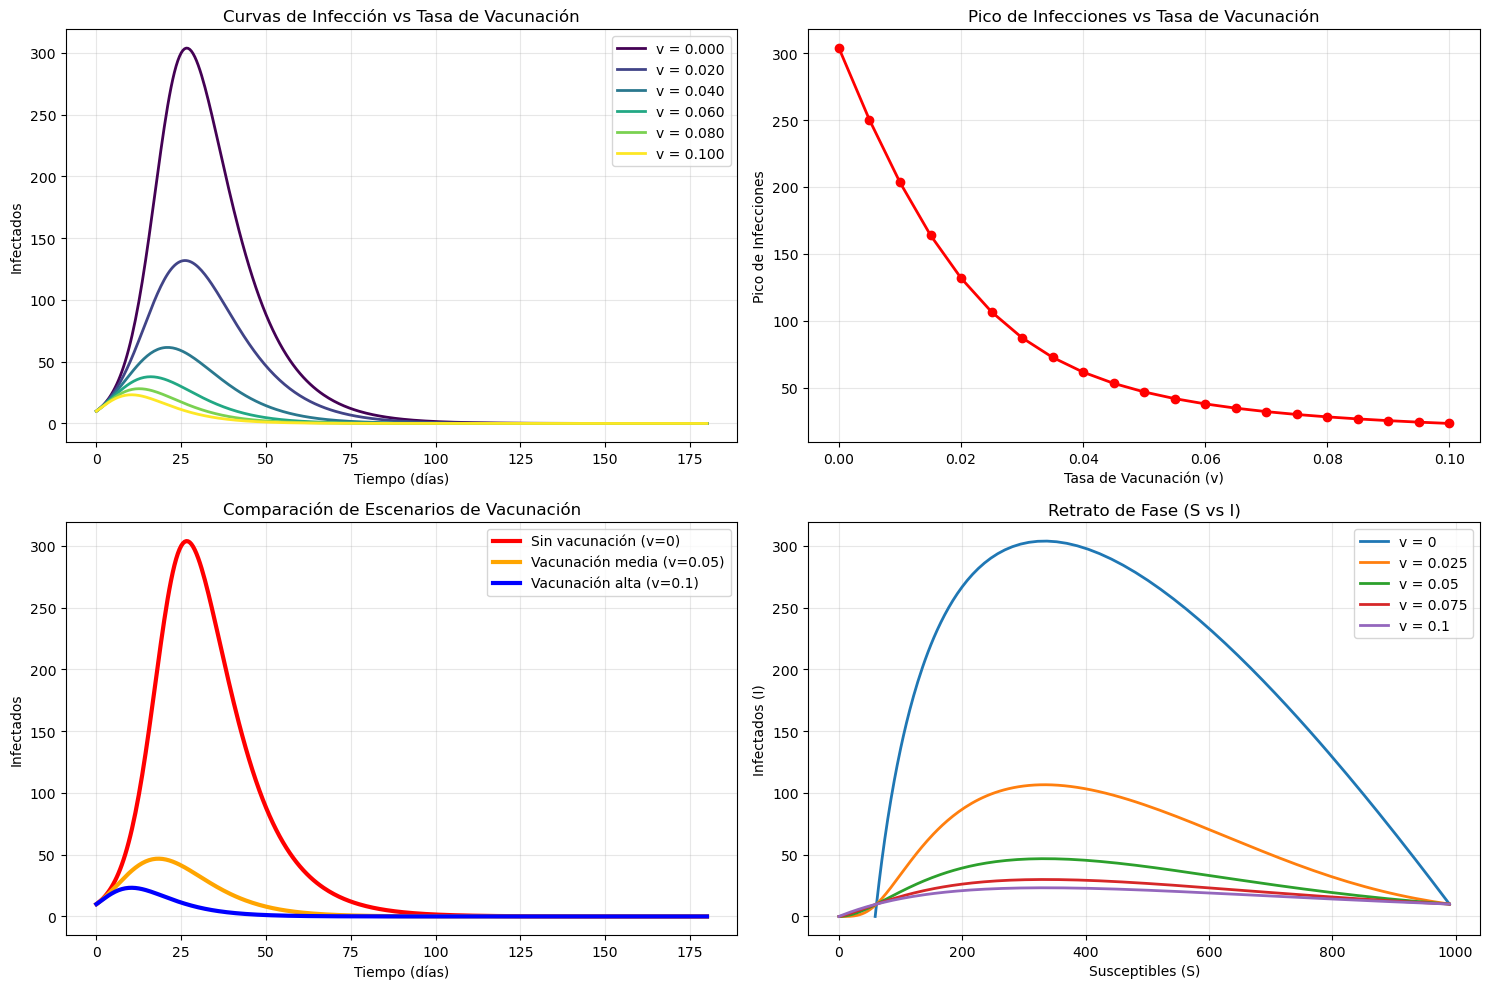


Búsqueda de la tasa mínima de vacunación:
R0 (sin vacunación) = β/γ = 2.9999999999999996
No se encontró una tasa de vacunación suficiente en el rango probado

Análisis teórico:
Fracción mínima a vacunar: 1 - 1/R0 = 0.667
RESULTADOS:
• Sin vacunación (v=0): Pico de 303.8 infectados
• Con vacunación media (v=0.05): Pico de 46.7 infectados
• Con vacunación alta (v=0.1): Pico de 23.2 infectados
• Reducción relativa con v=0.05: 84.6%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

class SIRVaccinationModel:
    def __init__(self, beta=0.3, gamma=0.1, v=0.05):
        self.beta = beta
        self.gamma = gamma
        self.v = v
    
    def sir_equations(self, y, t):
        S, I, R = y
        N = S + I + R 
        
        dS_dt = -self.beta * S * I / N - self.v * S
        dI_dt = self.beta * S * I / N - self.gamma * I
        dR_dt = self.gamma * I + self.v * S
        
        return [dS_dt, dI_dt, dR_dt]
    
    def simulate(self, S0=990, I0=10, R0=0, t_max=180, dt=0.5):
        t = np.arange(0, t_max + dt, dt)
        
        y0 = [S0, I0, R0]
        
        solution = odeint(self.sir_equations, y0, t)
        
        S_t = solution[:, 0]
        I_t = solution[:, 1]
        R_t = solution[:, 2]
        
        return t, S_t, I_t, R_t

def plot_sir_dynamics(t, S, I, R, title="Dinámica SIR con Vacunación"):
    plt.figure(figsize=(12, 8))
    
    plt.plot(t, S, 'b-', linewidth=2, label='Susceptibles (S)')
    plt.plot(t, I, 'r-', linewidth=2, label='Infectados (I)')
    plt.plot(t, R, 'g-', linewidth=2, label='Recuperados (R)')
    
    plt.xlabel('Tiempo (días)', fontsize=12)
    plt.ylabel('Número de individuos', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_vaccination_impact():
    v_values = np.linspace(0, 0.1, 21)
    peak_infections = []
        
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    colors = plt.cm.viridis(np.linspace(0, 1, len(v_values[::4])))
    
    for i, v in enumerate(v_values[::4]): 
        model = SIRVaccinationModel(v=v)
        t, S, I, R = model.simulate()
        plt.plot(t, I, color=colors[i], linewidth=2, label=f'v = {v:.3f}')
        peak_infections.append(max(I))
    
    plt.xlabel('Tiempo (días)')
    plt.ylabel('Infectados')
    plt.title('Curvas de Infección vs Tasa de Vacunación')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    peak_infections = []
    for v in v_values:
        model = SIRVaccinationModel(v=v)
        t, S, I, R = model.simulate()
        peak_infections.append(max(I))
    
    plt.subplot(2, 2, 2)
    plt.plot(v_values, peak_infections, 'ro-', linewidth=2, markersize=6)
    plt.xlabel('Tasa de Vacunación (v)')
    plt.ylabel('Pico de Infecciones')
    plt.title('Pico de Infecciones vs Tasa de Vacunación')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    v_compare = [0, 0.05, 0.1]
    colors_compare = ['red', 'orange', 'blue']
    labels_compare = ['Sin vacunación (v=0)', 'Vacunación media (v=0.05)', 'Vacunación alta (v=0.1)']
    
    for v, color, label in zip(v_compare, colors_compare, labels_compare):
        model = SIRVaccinationModel(v=v)
        t, S, I, R = model.simulate()
        plt.plot(t, I, color=color, linewidth=3, label=label)
    
    plt.xlabel('Tiempo (días)')
    plt.ylabel('Infectados')
    plt.title('Comparación de Escenarios de Vacunación')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    for i, v in enumerate([0, 0.025, 0.05, 0.075, 0.1]):
        model = SIRVaccinationModel(v=v)
        t, S, I, R = model.simulate()
        plt.plot(S, I, linewidth=2, label=f'v = {v}')
    
    plt.xlabel('Susceptibles (S)')
    plt.ylabel('Infectados (I)')
    plt.title('Retrato de Fase (S vs I)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return v_values, peak_infections

def find_minimum_vaccination_rate():
    print("\nBúsqueda de la tasa mínima de vacunación:")
    
    beta, gamma = 0.3, 0.1
    R0 = beta / gamma
    print(f"R0 (sin vacunación) = β/γ = {R0}")

    v_test = np.linspace(0, 0.3, 1000)
    threshold = 10  
    
    for v in v_test:
        model = SIRVaccinationModel(v=v)
        t, S, I, R = model.simulate()
        peak_infection = max(I)
        
        if peak_infection < threshold:
            v_critical = v
            break
    else:
        v_critical = None
    
    if v_critical:
        print(f"Tasa crítica de vacunación: v_crítico ≈ {v_critical:.4f}")
        print(f"Con esta tasa, el pico de infecciones es: {peak_infection:.1f}")
    else:
        print("No se encontró una tasa de vacunación suficiente en el rango probado")

    theoretical_threshold = 1 - 1/R0
    print(f"\nAnálisis teórico:")
    print(f"Fracción mínima a vacunar: 1 - 1/R0 = {theoretical_threshold:.3f}")
    
    return v_critical

if __name__ == "__main__":
    print("MODELO EPIDÉMICO SIR CON VACUNACIÓN")
    
    print("1. Simulación con parámetros básicos:")
    model = SIRVaccinationModel(beta=0.3, gamma=0.1, v=0.05)
    t, S, I, R = model.simulate()
    
    print(f"   - Población inicial: S={S[0]:.0f}, I={I[0]:.0f}, R={R[0]:.0f}")
    print(f"   - Pico de infecciones: {max(I):.1f} (día {t[np.argmax(I)]:.1f})")
    print(f"   - Población final: S={S[-1]:.1f}, I={I[-1]:.1f}, R={R[-1]:.1f}")
    
    plot_sir_dynamics(t, S, I, R, "Modelo SIR con Vacunación (β=0.3, γ=0.1, v=0.05)")
    
    print("\n2. Análisis del impacto de diferentes tasas de vacunación:")
    v_values, peak_infections = analyze_vaccination_impact()
    
    v_critical = find_minimum_vaccination_rate()
    
    
    print("RESULTADOS:")
    print(f"• Sin vacunación (v=0): Pico de {peak_infections[0]:.1f} infectados")
    print(f"• Con vacunación media (v=0.05): Pico de {peak_infections[10]:.1f} infectados")
    print(f"• Con vacunación alta (v=0.1): Pico de {peak_infections[-1]:.1f} infectados")
    if v_critical:
        print(f"• Tasa crítica de vacunación: v ≈ {v_critical:.4f}")
    print(f"• Reducción relativa con v=0.05: {(1-peak_infections[10]/peak_infections[0])*100:.1f}%")

3. Considere y responda

a. ¿Cómo altera la vacunación los ciclos de retroalimentación?
Sin vacunación, los ciclos de retroalimentación sigue el bucle: S → Infección (βSI) → I → Recuperación (γI) → R. Este se autoregula y disminuyen las tasas de infecciones a medida que S disminuye. Con la vacunación, se introduce un bucle de retroalimentación negativo más fuerte en donde la infección y vacunación reducen S de forma simultanea.Se puede observar que el pico se reduce significativamente cuando se introduce la vacunación. 
b. ¿Cuál es el valor mínimo de v para prevenir un brote?
- El valor mínimo debería tomar en cuenta que la vacunación debe ser más rápida que la propagación de la epidemia. Sin embargo, se observa que siempre hay un brote en donde hay infectados, por lo que se necesita un v elevado para mantener los brotes como no significativos. 

## Ejercicio #3
---
#### Parte práctica

Compare los métodos numéricos (Euler y RK4) para resolver un sistema no lineal
Instrucciones:
1. Implemente ambos métodos para:
a. Modelo de crecimiento logístico
b. Parámetros: r=0.1, K=1000, x₀=10
c. Horizonte de tiempo: 100 unidades
2. Analice y compare
a. Error relativo en t=50 para Δt=1.0
b. Threshold entre tiempo de cómputo y precisión
c. Estabilidad con Δt grandes (>5.0)

Modelo: ModeloCrecimientoLogistico
Parámetros: r=0.1, K=1000.0, x₀=10.0

Análisis Comparativo de Métodos Numéricos
      dt  Error Euler    Error RK4  Tiempo Euler   Tiempo RK4  Estabilidad
--------------------------------------------------------------------------------
     0.1      0.6390%      0.0000%     0.004962s    0.002576s  E:Si R:Si
     0.5      3.2154%      0.0000%     0.000142s    0.000719s  E:Si R:Si
     1.0      6.4703%      0.0001%     0.000072s    0.000260s  E:Si R:Si
     2.0     13.0172%      0.0012%     0.000042s    0.000132s  E:Si R:Si
     5.0     31.5593%      0.0384%     0.000020s    0.000054s  E:Si R:Si
     7.0     45.2802%      4.1694%     0.000012s    0.000123s  E:Si R:Si
    10.0     54.1527%      0.4447%     0.000043s    0.000080s  E:Si R:Si


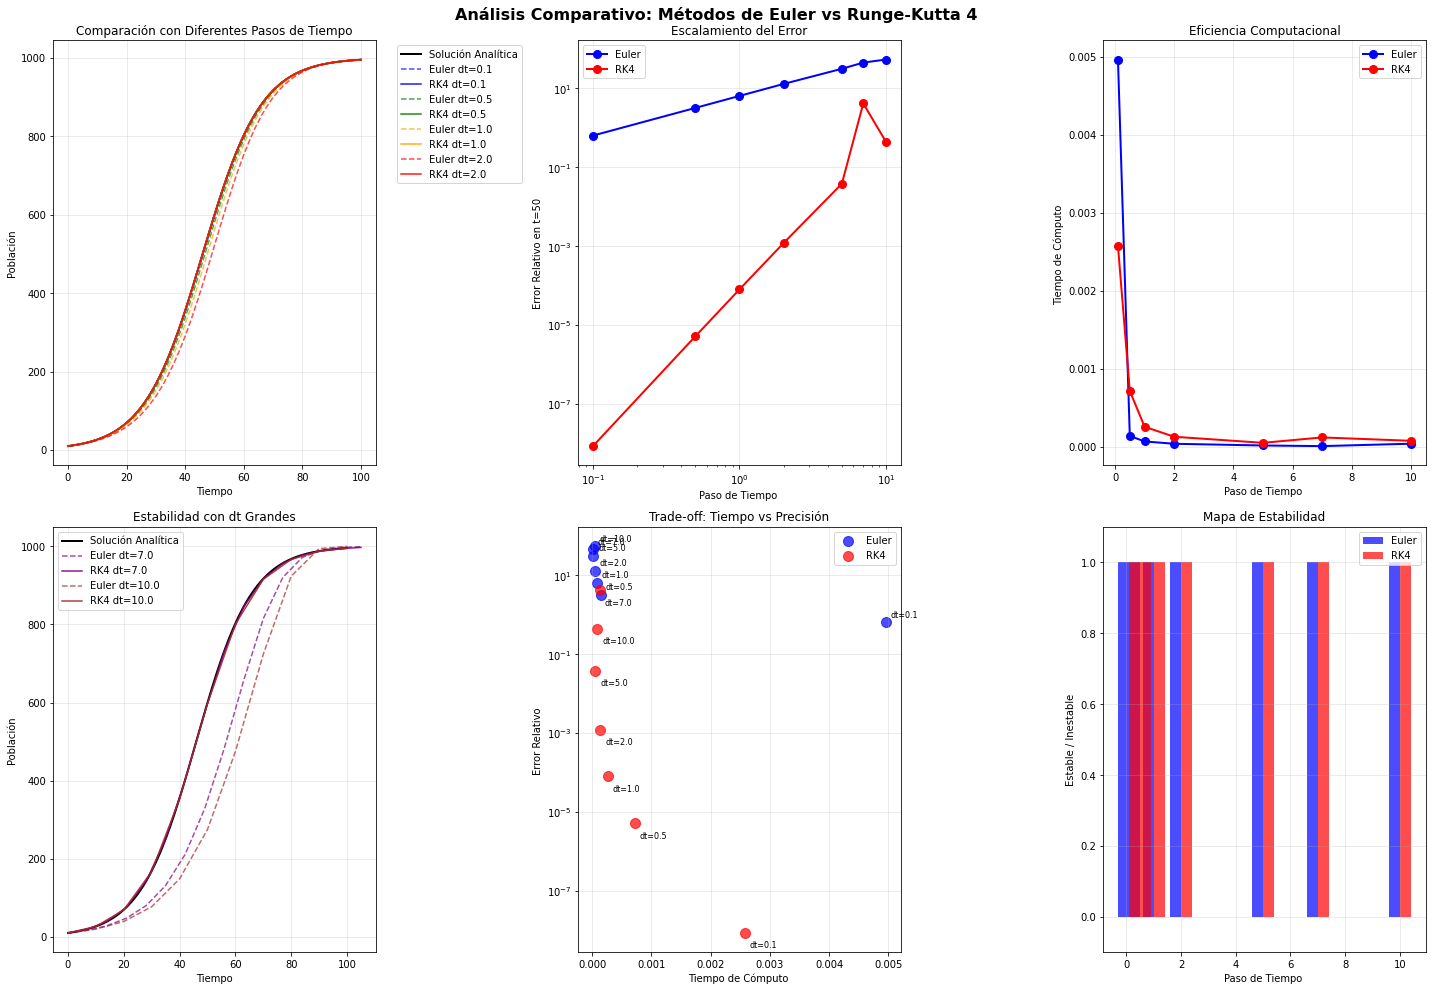


Respuestas a las preguntas realizadas en las instrucciones

1. ¿Qué método mantiene mejor la estabilidad?
--------------------------------------------------
• Euler: 7/7 casos estables
• RK4:   7/7 casos estables
→ Ambos métodos muestran estabilidad similar

2. ¿Cómo escala el error con dt en cada método?
--------------------------------------------------
Escalamiento observado:
Euler: Error dt^0.98
RK4:   Error dt^4.17

Teoría esperada:
Euler: dt^1
RK4:   dt^4

3. ¿Cuándo convendría elegir Euler en lugar de RK4?
--------------------------------------------------
Euler es 3.9x más rápido que RK4

Euler es preferible cuando:
1. La velocidad de cómputo es crítica
2. Recursos computacionales limitados

Análisis de convergencia
      dt  Error Euler    Error RK4      Ratio
--------------------------------------------------
    0.01    0.063798%    0.000000% 90980371597.7x
    0.10    0.639010%    0.000000% 74496043.1x
    1.00    6.470342%    0.000081%   80266.2x


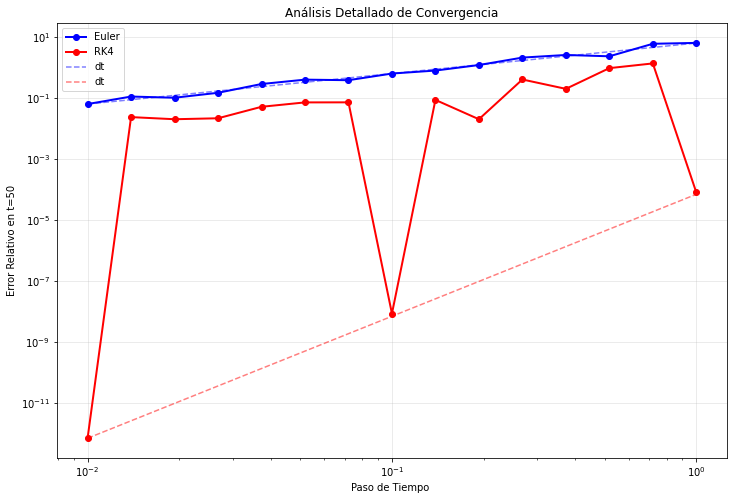


Para alcanzar error < 0.1% en t=50:
Euler requiere dt ≤ 0.0100
RK4 requiere dt ≤ 0.0100


In [9]:


import numpy as np
import matplotlib.pyplot as plt
import time
from dataclasses import dataclass, field
from typing import Callable, List, Tuple, Optional
from enum import Enum
from contextlib import contextmanager
from functools import wraps

class TipoMetodo(Enum):
    EULER = "euler"
    RUNGE_KUTTA_4 = "rk4"

@dataclass
class ParametrosModelo:
    tasa_crecimiento: float = 0.1  
    capacidad_carga: float = 1000.0  
    condicion_inicial: float = 10.0  
    tiempo_final: float = 100.0
    
    def __post_init__(self):
        if self.tasa_crecimiento <= 0:
            raise ValueError("La tasa de crecimiento debe ser positiva")
        if self.capacidad_carga <= 0:
            raise ValueError("La capacidad de carga debe ser positiva")
        if self.condicion_inicial <= 0:
            raise ValueError("La condición inicial debe ser positiva")

@dataclass
class ResultadoSimulacion:
    tiempos: np.ndarray
    valores: np.ndarray
    paso_tiempo: float
    metodo: TipoMetodo
    tiempo_computo: float = 0.0
    
    @property
    def es_estable(self) -> bool:
        return not (np.any(np.isnan(self.valores)) or 
                   np.any(np.isinf(self.valores)) or 
                   np.any(self.valores < 0))
    
    @property
    def valor_final(self) -> float:
        return self.valores[-1]
    
    def valor_en_tiempo(self, tiempo_objetivo: float) -> float:
        indice = np.argmin(np.abs(self.tiempos - tiempo_objetivo))
        return self.valores[indice]
    
    def __str__(self) -> str:
        return (f"Simulación {self.metodo.value}: "
                f"dt={self.paso_tiempo}, estable={self.es_estable}, "
                f"tiempo={self.tiempo_computo:.6f}s")

@dataclass
class AnalisisComparativo:
    pasos_tiempo: List[float] = field(default_factory=list)
    errores_euler: List[float] = field(default_factory=list)
    errores_rk4: List[float] = field(default_factory=list)
    tiempos_euler: List[float] = field(default_factory=list)
    tiempos_rk4: List[float] = field(default_factory=list)
    estabilidad_euler: List[bool] = field(default_factory=list)
    estabilidad_rk4: List[bool] = field(default_factory=list)
    
    def agregar_resultado(self, dt: float, resultado_euler: ResultadoSimulacion, 
                         resultado_rk4: ResultadoSimulacion, error_euler: float, 
                         error_rk4: float):
        self.pasos_tiempo.append(dt)
        self.errores_euler.append(error_euler)
        self.errores_rk4.append(error_rk4)
        self.tiempos_euler.append(resultado_euler.tiempo_computo)
        self.tiempos_rk4.append(resultado_rk4.tiempo_computo)
        self.estabilidad_euler.append(resultado_euler.es_estable)
        self.estabilidad_rk4.append(resultado_rk4.es_estable)


@contextmanager
def medidor_tiempo():
    inicio = time.time()
    yield
    fin = time.time()
    return fin - inicio

def cronometrar(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        if hasattr(resultado, 'tiempo_computo'):
            resultado.tiempo_computo = fin - inicio
        return resultado
    return wrapper


class ModeloMatematico:
    
    def __init__(self, parametros: ParametrosModelo):
        self.parametros = parametros
    
    def ecuacion_diferencial(self, x: float, t: float = 0.0) -> float:
        raise NotImplementedError("Debe implementar ecuacion_diferencial")
    
    def solucion_analitica(self, t: np.ndarray) -> np.ndarray:
        raise NotImplementedError("Debe implementar solucion_analitica")

class ModeloCrecimientoLogistico(ModeloMatematico):
    
    def ecuacion_diferencial(self, x: float, t: float = 0.0) -> float:
        r = self.parametros.tasa_crecimiento
        K = self.parametros.capacidad_carga
        return r * x * (1 - x / K)
    
    def solucion_analitica(self, t: np.ndarray) -> np.ndarray:
        r = self.parametros.tasa_crecimiento
        K = self.parametros.capacidad_carga
        x0 = self.parametros.condicion_inicial
        
        return K / (1 + ((K - x0) / x0) * np.exp(-r * t))
    
    def __call__(self, x: float, t: float = 0.0) -> float:
        return self.ecuacion_diferencial(x, t)

class ResolvedorNumericoBase:
    
    def __init__(self, modelo: ModeloMatematico):
        self.modelo = modelo
    
    def resolver(self, paso_tiempo: float) -> ResultadoSimulacion:
        raise NotImplementedError("Debe implementar resolver")
    
    def _crear_malla_temporal(self, paso_tiempo: float) -> np.ndarray:
        return np.arange(0, self.modelo.parametros.tiempo_final + paso_tiempo, paso_tiempo)

class ResolvedorEuler(ResolvedorNumericoBase):
    
    @cronometrar
    def resolver(self, paso_tiempo: float) -> ResultadoSimulacion:
        tiempos = self._crear_malla_temporal(paso_tiempo)
        valores = np.zeros(len(tiempos))
        valores[0] = self.modelo.parametros.condicion_inicial
        
        for i in range(1, len(tiempos)):
            valores[i] = valores[i-1] + paso_tiempo * self.modelo(valores[i-1], tiempos[i-1])
        
        return ResultadoSimulacion(
            tiempos=tiempos,
            valores=valores,
            paso_tiempo=paso_tiempo,
            metodo=TipoMetodo.EULER
        )

class ResolvedorRungeKutta4(ResolvedorNumericoBase):
    
    @cronometrar
    def resolver(self, paso_tiempo: float) -> ResultadoSimulacion:
        tiempos = self._crear_malla_temporal(paso_tiempo)
        valores = np.zeros(len(tiempos))
        valores[0] = self.modelo.parametros.condicion_inicial
        
        for i in range(1, len(tiempos)):
            x_actual = valores[i-1]
            t_actual = tiempos[i-1]
            
            k1 = paso_tiempo * self.modelo(x_actual, t_actual)
            k2 = paso_tiempo * self.modelo(x_actual + k1/2, t_actual + paso_tiempo/2)
            k3 = paso_tiempo * self.modelo(x_actual + k2/2, t_actual + paso_tiempo/2)
            k4 = paso_tiempo * self.modelo(x_actual + k3, t_actual + paso_tiempo)
            
            valores[i] = x_actual + (k1 + 2*k2 + 2*k3 + k4) / 6
        
        return ResultadoSimulacion(
            tiempos=tiempos,
            valores=valores,
            paso_tiempo=paso_tiempo,
            metodo=TipoMetodo.RUNGE_KUTTA_4
        )


class FabricaResolvedores:
    
    _resolvedores = {
        TipoMetodo.EULER: ResolvedorEuler,
        TipoMetodo.RUNGE_KUTTA_4: ResolvedorRungeKutta4
    }
    
    @classmethod
    def crear_resolvedor(cls, tipo: TipoMetodo, modelo: ModeloMatematico) -> ResolvedorNumericoBase:
        if tipo not in cls._resolvedores:
            raise ValueError(f"Tipo de resolvedor no soportado: {tipo}")
        
        return cls._resolvedores[tipo](modelo)
    
    @classmethod
    def obtener_tipos_disponibles(cls) -> List[TipoMetodo]:
        return list(cls._resolvedores.keys())

class AnalizadorComparativo:
    
    def __init__(self, modelo: ModeloMatematico):
        self.modelo = modelo
        self.resolver_euler = FabricaResolvedores.crear_resolvedor(TipoMetodo.EULER, modelo)
        self.resolver_rk4 = FabricaResolvedores.crear_resolvedor(TipoMetodo.RUNGE_KUTTA_4, modelo)
        self.resultados_cache = {}
    
    def calcular_error_relativo(self, resultado: ResultadoSimulacion, tiempo_objetivo: float = 50.0) -> float:
        valor_numerico = resultado.valor_en_tiempo(tiempo_objetivo)
        tiempos_referencia = np.array([tiempo_objetivo])
        valor_analitico = self.modelo.solucion_analitica(tiempos_referencia)[0]
        
        return abs(valor_numerico - valor_analitico) / valor_analitico * 100
    
    def ejecutar_simulacion(self, paso_tiempo: float, metodo: TipoMetodo) -> ResultadoSimulacion:
        clave_cache = (paso_tiempo, metodo)
        
        if clave_cache not in self.resultados_cache:
            if metodo == TipoMetodo.EULER:
                resultado = self.resolver_euler.resolver(paso_tiempo)
            else:
                resultado = self.resolver_rk4.resolver(paso_tiempo)
            
            self.resultados_cache[clave_cache] = resultado
        
        return self.resultados_cache[clave_cache]
    
    def analizar_convergencia(self, pasos_tiempo: List[float]) -> AnalisisComparativo:
        analisis = AnalisisComparativo()
        
        print("Análisis Comparativo de Métodos Numéricos")
        print("=" * 80)
        print(f"{'dt':>8} {'Error Euler':>12} {'Error RK4':>12} {'Tiempo Euler':>13} {'Tiempo RK4':>12} {'Estabilidad':>12}")
        print("-" * 80)
        
        for dt in pasos_tiempo:
            resultado_euler = self.ejecutar_simulacion(dt, TipoMetodo.EULER)
            resultado_rk4 = self.ejecutar_simulacion(dt, TipoMetodo.RUNGE_KUTTA_4)
            
            error_euler = self.calcular_error_relativo(resultado_euler)
            error_rk4 = self.calcular_error_relativo(resultado_rk4)
            
            analisis.agregar_resultado(dt, resultado_euler, resultado_rk4, error_euler, error_rk4)
            
            estabilidad = f"E:{'Si' if resultado_euler.es_estable else 'No'} R:{'Si' if resultado_rk4.es_estable else 'No'}"
            print(f"{dt:>8.1f} {error_euler:>11.4f}% {error_rk4:>11.4f}% "
                  f"{resultado_euler.tiempo_computo:>12.6f}s {resultado_rk4.tiempo_computo:>11.6f}s {estabilidad:>10}")
        
        return analisis
    
    def generar_solucion_referencia(self, num_puntos: int = 1000) -> Tuple[np.ndarray, np.ndarray]:
        tiempos_ref = np.linspace(0, self.modelo.parametros.tiempo_final, num_puntos)
        valores_ref = self.modelo.solucion_analitica(tiempos_ref)
        return tiempos_ref, valores_ref


class VisualizadorResultados:
    
    def __init__(self, analizador: AnalizadorComparativo):
        self.analizador = analizador
    
    def graficar_comparacion_completa(self, analisis: AnalisisComparativo):
        fig, ejes = plt.subplots(2, 3, figsize=(20, 14))
        fig.suptitle('Análisis Comparativo: Métodos de Euler vs Runge-Kutta 4', 
                     fontsize=16, fontweight='bold')
        
        tiempos_ref, valores_ref = self.analizador.generar_solucion_referencia()
        
        self._graficar_soluciones(ejes[0, 0], tiempos_ref, valores_ref, analisis)
        
        self._graficar_escalamiento_error(ejes[0, 1], analisis)
        
        self._graficar_eficiencia(ejes[0, 2], analisis)
        
        self._graficar_estabilidad_dt_grandes(ejes[1, 0], tiempos_ref, valores_ref, analisis)
        
        self._graficar_tradeoff(ejes[1, 1], analisis)
        
        self._graficar_mapa_estabilidad(ejes[1, 2], analisis)
        
        plt.tight_layout()
        plt.show()
    
    def _graficar_soluciones(self, ax, tiempos_ref, valores_ref, analisis):
        ax.plot(tiempos_ref, valores_ref, 'k-', linewidth=2, label='Solución Analítica')
        
        colores = ['blue', 'green', 'orange', 'red']
        dt_pequenos = [dt for dt in analisis.pasos_tiempo if dt <= 2.0]
        
        for i, dt in enumerate(dt_pequenos[:4]):
            resultado_euler = self.analizador.ejecutar_simulacion(dt, TipoMetodo.EULER)
            resultado_rk4 = self.analizador.ejecutar_simulacion(dt, TipoMetodo.RUNGE_KUTTA_4)
            
            ax.plot(resultado_euler.tiempos, resultado_euler.valores, '--', 
                   color=colores[i], alpha=0.7, label=f'Euler dt={dt}')
            ax.plot(resultado_rk4.tiempos, resultado_rk4.valores, '-', 
                   color=colores[i], alpha=0.9, label=f'RK4 dt={dt}')
        
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Población')
        ax.set_title('Comparación con Diferentes Pasos de Tiempo')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
    
    def _graficar_escalamiento_error(self, ax, analisis):
        ax.loglog(analisis.pasos_tiempo, analisis.errores_euler, 'bo-', 
                 label='Euler', linewidth=2, markersize=8)
        ax.loglog(analisis.pasos_tiempo, analisis.errores_rk4, 'ro-', 
                 label='RK4', linewidth=2, markersize=8)
        ax.set_xlabel('Paso de Tiempo ')
        ax.set_ylabel('Error Relativo en t=50')
        ax.set_title('Escalamiento del Error')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    def _graficar_eficiencia(self, ax, analisis):
        ax.plot(analisis.pasos_tiempo, analisis.tiempos_euler, 'bo-', 
               label='Euler', linewidth=2, markersize=8)
        ax.plot(analisis.pasos_tiempo, analisis.tiempos_rk4, 'ro-', 
               label='RK4', linewidth=2, markersize=8)
        ax.set_xlabel('Paso de Tiempo ')
        ax.set_ylabel('Tiempo de Cómputo ')
        ax.set_title('Eficiencia Computacional')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    def _graficar_estabilidad_dt_grandes(self, ax, tiempos_ref, valores_ref, analisis):
        ax.plot(tiempos_ref, valores_ref, 'k-', linewidth=2, label='Solución Analítica')
        
        dt_grandes = [dt for dt in analisis.pasos_tiempo if dt > 5.0]
        colores_grandes = ['purple', 'brown', 'pink']
        
        for i, dt in enumerate(dt_grandes[:3]):
            resultado_euler = self.analizador.ejecutar_simulacion(dt, TipoMetodo.EULER)
            resultado_rk4 = self.analizador.ejecutar_simulacion(dt, TipoMetodo.RUNGE_KUTTA_4)
            
            if resultado_euler.es_estable:
                ax.plot(resultado_euler.tiempos, resultado_euler.valores, '--', 
                       color=colores_grandes[i], alpha=0.7, label=f'Euler dt={dt}')
            
            if resultado_rk4.es_estable:
                ax.plot(resultado_rk4.tiempos, resultado_rk4.valores, '-', 
                       color=colores_grandes[i], alpha=0.9, label=f'RK4 dt={dt}')
        
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Población')
        ax.set_title('Estabilidad con dt Grandes')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    def _graficar_tradeoff(self, ax, analisis):
        ax.scatter(analisis.tiempos_euler, analisis.errores_euler, 
                  c='blue', s=100, alpha=0.7, label='Euler')
        ax.scatter(analisis.tiempos_rk4, analisis.errores_rk4, 
                  c='red', s=100, alpha=0.7, label='RK4')
        
        for i, dt in enumerate(analisis.pasos_tiempo):
            ax.annotate(f'dt={dt}', 
                       (analisis.tiempos_euler[i], analisis.errores_euler[i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
            ax.annotate(f'dt={dt}', 
                       (analisis.tiempos_rk4[i], analisis.errores_rk4[i]),
                       xytext=(5, -15), textcoords='offset points', fontsize=8)
        
        ax.set_xlabel('Tiempo de Cómputo ')
        ax.set_ylabel('Error Relativo ')
        ax.set_title('Trade-off: Tiempo vs Precisión')
        ax.set_yscale('log')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    def _graficar_mapa_estabilidad(self, ax, analisis):
        dt_array = np.array(analisis.pasos_tiempo)
        euler_estable = np.array(analisis.estabilidad_euler, dtype=int)
        rk4_estable = np.array(analisis.estabilidad_rk4, dtype=int)
        
        ax.bar(dt_array - 0.2, euler_estable, 0.4, label='Euler', color='blue', alpha=0.7)
        ax.bar(dt_array + 0.2, rk4_estable, 0.4, label='RK4', color='red', alpha=0.7)
        ax.set_xlabel('Paso de Tiempo ')
        ax.set_ylabel('Estable / Inestable')
        ax.set_title('Mapa de Estabilidad')
        ax.set_ylim(-0.1, 1.1)
        ax.legend()
        ax.grid(True, alpha=0.3)


class AnalizadorRespuestas:
    
    def __init__(self, analisis: AnalisisComparativo):
        self.analisis = analisis
    
    def generar_respuestas_completas(self):
        print("\n" + "="*80)
        print("Respuestas a las preguntas realizadas en las instrucciones")
        print("="*80)
        
        self._analizar_estabilidad()
        self._analizar_escalamiento_error()
        self._analizar_cuando_usar_euler()    
    def _analizar_estabilidad(self):
        print("\n1. ¿Qué método mantiene mejor la estabilidad?")
        print("-" * 50)
        
        euler_estables = sum(self.analisis.estabilidad_euler)
        rk4_estables = sum(self.analisis.estabilidad_rk4)
        total_casos = len(self.analisis.pasos_tiempo)
        
        print(f"• Euler: {euler_estables}/{total_casos} casos estables")
        print(f"• RK4:   {rk4_estables}/{total_casos} casos estables")
        
        if rk4_estables > euler_estables:
            print("→ RK4 mantiene mejor estabilidad, especialmente con dt grandes")
        elif euler_estables > rk4_estables:
            print("→ Euler mantiene mejor estabilidad")
        else:
            print("→ Ambos métodos muestran estabilidad similar")
    
    def _analizar_escalamiento_error(self):
        print("\n2. ¿Cómo escala el error con dt en cada método?")
        print("-" * 50)
        
        dt_array = np.array(self.analisis.pasos_tiempo)
        euler_errors = np.array(self.analisis.errores_euler)
        rk4_errors = np.array(self.analisis.errores_rk4)
        
        indices_validos = ((euler_errors > 0) & (rk4_errors > 0) & 
                          (~np.isnan(euler_errors)) & (~np.isnan(rk4_errors)))
        
        if np.sum(indices_validos) > 2:
            dt_validos = dt_array[indices_validos]
            euler_validos = euler_errors[indices_validos]
            rk4_validos = rk4_errors[indices_validos]
            
            log_dt = np.log10(dt_validos)
            log_euler_error = np.log10(euler_validos)
            log_rk4_error = np.log10(rk4_validos)
            
            pendiente_euler = np.polyfit(log_dt, log_euler_error, 1)[0]
            pendiente_rk4 = np.polyfit(log_dt, log_rk4_error, 1)[0]
            
            print(f"Escalamiento observado:")
            print(f"Euler: Error dt^{pendiente_euler:.2f}")
            print(f"RK4:   Error dt^{pendiente_rk4:.2f}")
            print(f"\nTeoría esperada:")
            print(f"Euler: dt^1")
            print(f"RK4:   dt^4")
    
    def _analizar_cuando_usar_euler(self):
        print("\n3. ¿Cuándo convendría elegir Euler en lugar de RK4?")
        print("-" * 50)
        
        aceleracion_promedio = np.mean([t_rk4/t_euler for t_euler, t_rk4 
                                       in zip(self.analisis.tiempos_euler, 
                                             self.analisis.tiempos_rk4)])
        
        print(f"Euler es {aceleracion_promedio:.1f}x más rápido que RK4")
        print("\nEuler es preferible cuando:")
        print("1. La velocidad de cómputo es crítica")
        print("2. Recursos computacionales limitados")


parametros = ParametrosModelo(
    tasa_crecimiento=0.1,
    capacidad_carga=1000.0,
    condicion_inicial=10.0,
    tiempo_final=100.0
)

modelo = ModeloCrecimientoLogistico(parametros)
analizador = AnalizadorComparativo(modelo)

pasos_tiempo_analisis = [0.1, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0]

print(f"Modelo: {modelo.__class__.__name__}")
print(f"Parámetros: r={parametros.tasa_crecimiento}, K={parametros.capacidad_carga}, x₀={parametros.condicion_inicial}")
print()

analisis_resultados = analizador.analizar_convergencia(pasos_tiempo_analisis)

visualizador = VisualizadorResultados(analizador)
visualizador.graficar_comparacion_completa(analisis_resultados)

analizador_respuestas = AnalizadorRespuestas(analisis_resultados)
analizador_respuestas.generar_respuestas_completas()


print("\n" + "="*80)
print("Análisis de convergencia")
print("="*80)

pasos_convergencia = np.logspace(-2, 0, 15)  
errores_euler_conv = []
errores_rk4_conv = []

print(f"{'dt':>8} {'Error Euler':>12} {'Error RK4':>12} {'Ratio':>10}")
print("-" * 50)

for dt in pasos_convergencia:
    resultado_euler = analizador.ejecutar_simulacion(dt, TipoMetodo.EULER)
    resultado_rk4 = analizador.ejecutar_simulacion(dt, TipoMetodo.RUNGE_KUTTA_4)
    
    error_euler = analizador.calcular_error_relativo(resultado_euler, 50.0)
    error_rk4 = analizador.calcular_error_relativo(resultado_rk4, 50.0)
    
    errores_euler_conv.append(error_euler)
    errores_rk4_conv.append(error_rk4)
    
    ratio = error_euler / error_rk4 if error_rk4 > 0 else float('inf')
    
    if dt in [0.01, 0.1, 1.0]:
        print(f"{dt:>8.2f} {error_euler:>11.6f}% {error_rk4:>11.6f}% {ratio:>9.1f}x")

plt.figure(figsize=(12, 8))
plt.loglog(pasos_convergencia, errores_euler_conv, 'bo-', label='Euler', linewidth=2, markersize=6)
plt.loglog(pasos_convergencia, errores_rk4_conv, 'ro-', label='RK4', linewidth=2, markersize=6)

plt.loglog(pasos_convergencia, pasos_convergencia * errores_euler_conv[0] / pasos_convergencia[0], 
           'b--', alpha=0.5, label='dt')
plt.loglog(pasos_convergencia, pasos_convergencia**4 * errores_rk4_conv[0] / pasos_convergencia[0]**4, 
           'r--', alpha=0.5, label='dt')

plt.xlabel('Paso de Tiempo ')
plt.ylabel('Error Relativo en t=50')
plt.title('Análisis Detallado de Convergencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

precision_objetivo = 0.1  
print(f"\nPara alcanzar error < {precision_objetivo}% en t=50:")

for i, error in enumerate(errores_euler_conv):
    if error < precision_objetivo:
        print(f"Euler requiere dt ≤ {pasos_convergencia[i]:.4f}")
        break

for i, error in enumerate(errores_rk4_conv):
    if error < precision_objetivo:
        print(f"RK4 requiere dt ≤ {pasos_convergencia[i]:.4f}")
        break